In [46]:
import numpy as np  #does mathematical operation
import matplotlib.pyplot as plt #For plotting the graphs
import pandas as pd #making the data frames and import the csv files
import random
import cv2 
import matplotlib.image as mpimg

In [47]:
from google.colab import drive #to import the google drive data

In [48]:
drive.mount('/content/drive')   # to mount the drive data into the colab cloud and enter the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
cd /content/drive/"My Drive/Colab Notebooks/K-meansClusteringDataset" 

/content/drive/My Drive/Colab Notebooks/K-meansClusteringDataset


In [50]:
my_original_image = cv2.imread('me1.jpg')

In [51]:
my_original_image

array([[[ 81,  54,  44],
        [156, 129, 119],
        [222, 195, 185],
        ...,
        [ 57,  47,  37],
        [ 51,  39,  33],
        [ 56,  46,  39]],

       [[184, 157, 147],
        [201, 174, 164],
        [220, 193, 183],
        ...,
        [162, 145, 136],
        [116, 100,  93],
        [ 64,  51,  43]],

       [[229, 202, 192],
        [222, 195, 185],
        [219, 192, 182],
        ...,
        [226, 200, 193],
        [193, 170, 162],
        [158, 135, 127]],

       ...,

       [[ 62,  48,  36],
        [ 62,  48,  36],
        [ 63,  47,  34],
        ...,
        [ 78,  64,  46],
        [ 73,  58,  42],
        [ 64,  49,  33]],

       [[ 64,  50,  38],
        [ 64,  50,  38],
        [ 64,  48,  35],
        ...,
        [ 78,  64,  46],
        [ 72,  57,  41],
        [ 62,  47,  31]],

       [[ 65,  51,  39],
        [ 64,  50,  38],
        [ 64,  48,  35],
        ...,
        [ 76,  62,  44],
        [ 70,  55,  39],
        [ 60,  45,  29]]

In [52]:
my_original_image.shape

(150, 150, 3)

In [53]:
my_original_image = (my_original_image/255).reshape(150*150,3)

In [54]:
my_original_image

array([[0.31764706, 0.21176471, 0.17254902],
       [0.61176471, 0.50588235, 0.46666667],
       [0.87058824, 0.76470588, 0.7254902 ],
       ...,
       [0.29803922, 0.24313725, 0.17254902],
       [0.2745098 , 0.21568627, 0.15294118],
       [0.23529412, 0.17647059, 0.11372549]])

In [56]:
#All the model buliding and the basic model evaluation
def calc_distance(X1,X2):
    return ((sum(X1-X2)**2)**0.5)

def findclosestcentroid(c,X):
    assign_centroids=[]
    for i in X:
        distance_list=[]
        for j in c:
            distance_list.append(calc_distance(i,j))
        assign_centroids.append(np.argmin(distance_list))
    return assign_centroids

def calc_centroids(cluster,X):
    new_centroid = []
    new_df1 = pd.concat([pd.DataFrame(X),pd.DataFrame(cluster,columns=['clusters'])],axis=1)
    for c in set(new_df1['clusters']):
        current_cluster = new_df1[new_df1['clusters']==c][new_df1.columns[:-1]]        #Consodering all the X and Y values for particular cluster C
        current_mean = current_cluster.mean(axis=0)
        new_centroid.append(current_mean)
    return new_centroid

In [57]:
n=15    #number of epohcs

[17231]
[[0.31372549 0.25098039 0.18431373]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


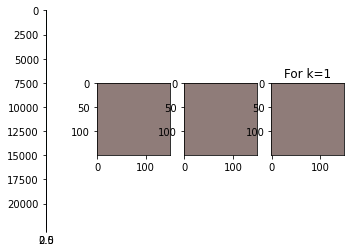

In [58]:
#For K =1 
my_original_image = (my_original_image/255).reshape(150*150,3)

#Initilize the Centroids
init_centroids_1 = random.sample(range(0,len(my_original_image)),1)
print(init_centroids_1)

centroids_1=[]
for i in init_centroids_1:
    centroids_1.append(my_original_image[i])

centroids_1 = np.array(centroids_1)
print(centroids_1)

centroids_for_display_epochs=[]
for i in range(n):
    print(i)
    get_centroid = findclosestcentroid(centroids_1,my_original_image)     #we have obtained the cluster number for each observation
    centroids_1 = calc_centroids(get_centroid,my_original_image)
    if(i==0):
        centroids_for_display_epochs.append(centroids_1)
    if(i==n//2):
        centroids_for_display_epochs.append(centroids_1)

#recovering the Image for Each epochs displayed
myOriginal_recovered_1 = my_original_image.copy()
for i in range(len(my_original_image)):
    myOriginal_recovered_1[i] = centroids_for_display_epochs[0][get_centroid[i]]
myOriginal_recovered_1_plot = myOriginal_recovered_1.reshape(150,150, 3)

myOriginal_recovered_2 = my_original_image.copy()
for i in range(len(my_original_image)):
    myOriginal_recovered_2[i] = centroids_for_display_epochs[1][get_centroid[i]]
myOriginal_recovered_2_plot = myOriginal_recovered_2.reshape(150,150, 3)

myOriginal_recovered_3 = my_original_image.copy()
for i in range(len(my_original_image)):
    myOriginal_recovered_3[i] = centroids_1[get_centroid[i]]
myOriginal_recovered_3_plot = myOriginal_recovered_3.reshape(150,150, 3)


fig,ax = plt.subplots(1,4)
plt.title('For k=1')
ax[0].imshow(my_original_image)
ax[1].imshow(myOriginal_recovered_1_plot)
ax[2].imshow(myOriginal_recovered_2_plot)
ax[3].imshow(myOriginal_recovered_3_plot)
    

[19293, 5667]
[[0.29019608 0.23529412 0.16078431]
 [0.8745098  0.76078431 0.70196078]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


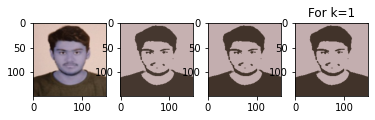

In [59]:
#For K =2
my_original_image = (my_original_image/255).reshape(150*150,3)
#Initilize the Centroids
init_centroids_2 = random.sample(range(0,len(my_original_image)),2)
print(init_centroids_2)

centroids_2=[]
for i in init_centroids_2:
    centroids_2.append(my_original_image[i])

centroids_2 = np.array(centroids_2)
print(centroids_2)

centroids_for_display_epochs_2=[]
for i in range(n):
    print(i)
    get_centroid = findclosestcentroid(centroids_2,my_original_image)     #we have obtained the cluster number for each observation
    centroids_2 = calc_centroids(get_centroid,my_original_image)
    if(i==0):
        centroids_for_display_epochs_2.append(centroids_2)
    if(i==n//2):
        centroids_for_display_epochs_2.append(centroids_2)

#recovering the Image for Each epochs displayed
myOriginal_recovered_1 = my_original_image.copy()
for i in range(len(my_original_image)):
    myOriginal_recovered_1[i] = centroids_for_display_epochs_2[0][get_centroid[i]]
myOriginal_recovered_1_plot = myOriginal_recovered_1.reshape(150,150, 3)

myOriginal_recovered_2 = my_original_image.copy()
for i in range(len(my_original_image)):
    myOriginal_recovered_2[i] = centroids_for_display_epochs_2[1][get_centroid[i]]
myOriginal_recovered_2_plot = myOriginal_recovered_2.reshape(150,150, 3)

myOriginal_recovered_3 = my_original_image.copy()
for i in range(len(my_original_image)):
    myOriginal_recovered_3[i] = centroids_2[get_centroid[i]]
myOriginal_recovered_3_plot = myOriginal_recovered_2.reshape(150,150, 3)

my_original_image = cv2.imread('me1.jpg')
fig,ax = plt.subplots(1,4)
plt.title('For k=2')
ax[0].imshow(my_original_image)
ax[1].imshow(myOriginal_recovered_1_plot)
ax[2].imshow(myOriginal_recovered_2_plot)
ax[3].imshow(myOriginal_recovered_3_plot)
    

[249, 199, 9418]
[[0.82352941 0.73333333 0.70196078]
 [0.85098039 0.76078431 0.72941176]
 [0.81960784 0.7372549  0.72941176]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


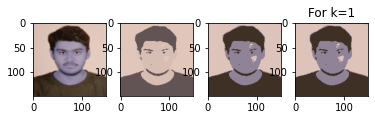

In [60]:
#For K =3
my_original_image = (my_original_image/255).reshape(150*150,3)
#Initilize the Centroids
init_centroids_3 = random.sample(range(0,len(my_original_image)),3)
print(init_centroids_3)

centroids_3=[]
for i in init_centroids_3:
    centroids_3.append(my_original_image[i])

centroids_3 = np.array(centroids_3)
print(centroids_3)

centroids_for_display_epochs_3=[]
for i in range(n):
    print(i)
    get_centroid = findclosestcentroid(centroids_3,my_original_image)     #we have obtained the cluster number for each observation
    centroids_3 = calc_centroids(get_centroid,my_original_image)
    if(i==0):
        centroids_for_display_epochs_3.append(centroids_3)
    if(i==n//2):
        centroids_for_display_epochs_3.append(centroids_3)

#recovering the Image for Each epochs displayed
myOriginal_recovered_1 = my_original_image.copy()
for i in range(len(my_original_image)):
    myOriginal_recovered_1[i] = centroids_for_display_epochs_3[0][get_centroid[i]]
myOriginal_recovered_1_plot = myOriginal_recovered_1.reshape(150,150, 3)

myOriginal_recovered_2 = my_original_image.copy()
for i in range(len(my_original_image)):
    myOriginal_recovered_2[i] = centroids_for_display_epochs_3[1][get_centroid[i]]
myOriginal_recovered_2_plot = myOriginal_recovered_2.reshape(150,150, 3)

myOriginal_recovered_3 = my_original_image.copy()
for i in range(len(my_original_image)):
    myOriginal_recovered_3[i] = centroids_3[get_centroid[i]]
myOriginal_recovered_3_plot = myOriginal_recovered_2.reshape(150,150, 3)

my_original_image = cv2.imread('me1.jpg')
fig,ax = plt.subplots(1,4)
plt.title('For k=3')
ax[0].imshow(my_original_image)
ax[1].imshow(myOriginal_recovered_1_plot)
ax[2].imshow(myOriginal_recovered_2_plot)
ax[3].imshow(myOriginal_recovered_3_plot)
    

In [ ]:
#For K =4
my_original_image = (my_original_image/255).reshape(150*150,3)
#Initilize the Centroids
init_centroids_4 = random.sample(range(0,len(my_original_image)),3)
print(init_centroids_4)

centroids_4=[]
for i in init_centroids_4:
    centroids_4.append(my_original_image[i])

centroids_4 = np.array(centroids_4)
print(centroids_4)

centroids_for_display_epochs_4=[]
for i in range(n):
    print(i)
    get_centroid = findclosestcentroid(centroids_4,my_original_image)     #we have obtained the cluster number for each observation
    centroids_4 = calc_centroids(get_centroid,my_original_image)
    if(i==0):
        centroids_for_display_epochs_4.append(centroids_4)
    if(i==n//2):
        centroids_for_display_epochs_4.append(centroids_4)

#recovering the Image for Each epochs displayed
myOriginal_recovered_1 = my_original_image.copy()
for i in range(len(my_original_image)):
    myOriginal_recovered_1[i] = centroids_for_display_epochs_4[0][get_centroid[i]]
myOriginal_recovered_1_plot = myOriginal_recovered_1.reshape(150,150, 3)

myOriginal_recovered_2 = my_original_image.copy()
for i in range(len(my_original_image)):
    myOriginal_recovered_2[i] = centroids_for_display_epochs_4[1][get_centroid[i]]
myOriginal_recovered_2_plot = myOriginal_recovered_2.reshape(150,150, 3)

myOriginal_recovered_3 = my_original_image.copy()
for i in range(len(my_original_image)):
    myOriginal_recovered_3[i] = centroids_4[get_centroid[i]]
myOriginal_recovered_3_plot = myOriginal_recovered_2.reshape(150,150, 3)

my_original_image = cv2.imread('me1.jpg')
fig,ax = plt.subplots(1,4)
plt.title('For k=4')
ax[0].imshow(my_original_image)
ax[1].imshow(myOriginal_recovered_1_plot)
ax[2].imshow(myOriginal_recovered_2_plot)
ax[3].imshow(myOriginal_recovered_3_plot)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KeyboardInterrupt: ignored

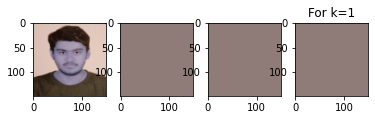

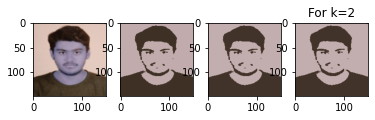

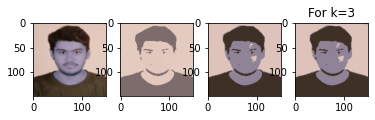

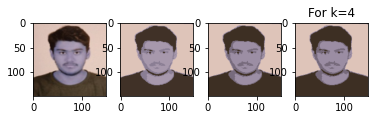

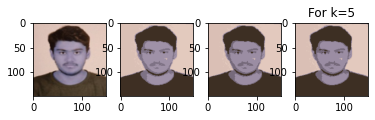

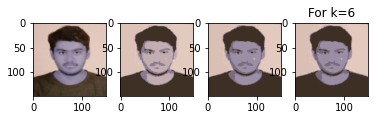

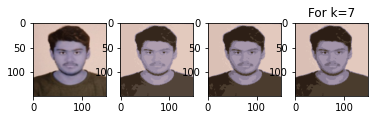

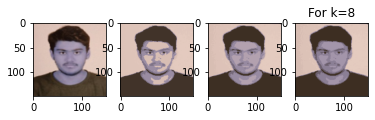

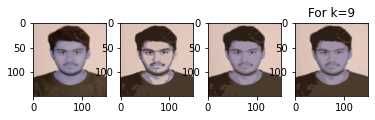

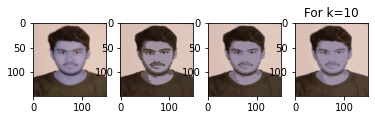

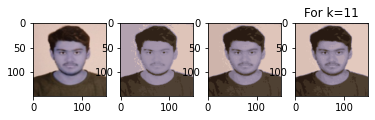

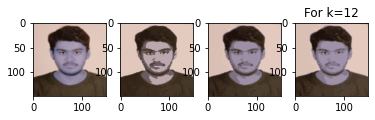

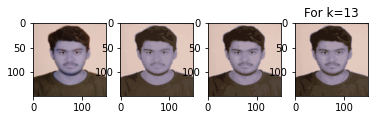

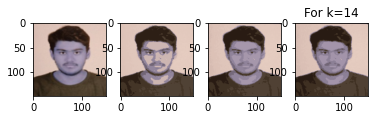

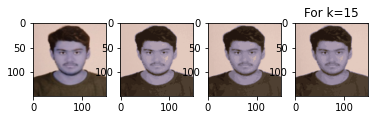

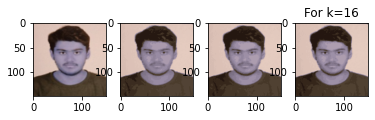

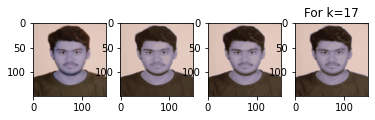

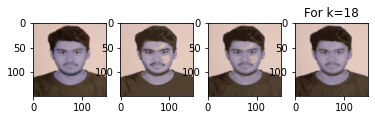

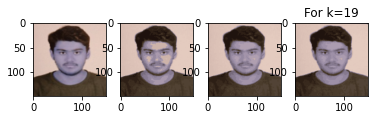

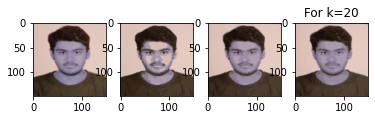

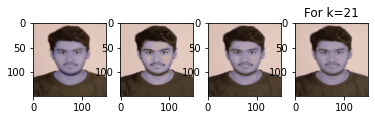

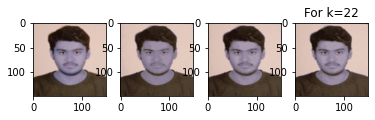

In [69]:
#For K =1 
for k in range(1,26):
    my_original_image = (my_original_image/255).reshape(150*150,3)

    #Initilize the Centroids
    init_centroids_1 = random.sample(range(0,len(my_original_image)),k)
    #print(init_centroids_1)

    centroids_1=[]
    for i in init_centroids_1:
        centroids_1.append(my_original_image[i])

    centroids_1 = np.array(centroids_1)
    #print(centroids_1)

    centroids_for_display_epochs=[]
    for i in range(n):
        #print(i)
        get_centroid = findclosestcentroid(centroids_1,my_original_image)     #we have obtained the cluster number for each observation
        centroids_1 = calc_centroids(get_centroid,my_original_image)
        if(i==0):
            centroids_for_display_epochs.append(centroids_1)
        if(i==n//2):
            centroids_for_display_epochs.append(centroids_1)

    #recovering the Image for Each epochs displayed
    myOriginal_recovered_1 = my_original_image.copy()
    for i in range(len(my_original_image)):
        myOriginal_recovered_1[i] = centroids_for_display_epochs[0][get_centroid[i]]
    myOriginal_recovered_1_plot = myOriginal_recovered_1.reshape(150,150, 3)

    myOriginal_recovered_2 = my_original_image.copy()
    for i in range(len(my_original_image)):
        myOriginal_recovered_2[i] = centroids_for_display_epochs[1][get_centroid[i]]
    myOriginal_recovered_2_plot = myOriginal_recovered_2.reshape(150,150, 3)

    myOriginal_recovered_3 = my_original_image.copy()
    for i in range(len(my_original_image)):
        myOriginal_recovered_3[i] = centroids_1[get_centroid[i]]
    myOriginal_recovered_3_plot = myOriginal_recovered_3.reshape(150,150, 3)

    my_original_image = cv2.imread('me1.jpg')
    fig,ax = plt.subplots(1,4)
    plt.title('For k='+str(k))
    ax[0].imshow(my_original_image)
    ax[1].imshow(myOriginal_recovered_1_plot)
    ax[2].imshow(myOriginal_recovered_2_plot)
    ax[3].imshow(myOriginal_recovered_3_plot)
    